In [1]:
import pandas as pd
import numpy as np
import re as re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from itertools import cycle
import calmap

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


In [2]:
cal_df = pd.read_csv('m5-forecasting-accuracy/calendar.csv')
saltrvald_df = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
saltreval_df = pd.read_csv('m5-forecasting-accuracy/sales_train_evaluation.csv')
sampsub_df = pd.read_csv('m5-forecasting-accuracy/sample_submission.csv')
sellprices_df = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

In [3]:
saltrvald_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
saltrvald_df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [5]:
def get_timeseries_df(item):
    data_cols = [c for c in saltrvald_df.columns if 'd_' in c] #getting sales data columns
    
    example_df = saltrvald_df.loc[saltrvald_df['id'] == item].set_index('id')[data_cols].T
    example_df = example_df.rename(columns= lambda x : re.sub('_validation', '', x)) #fixing validation in name
    example_df = example_df.reset_index().rename(columns={'index': 'd'}) #giving index column a name
    example_df = example_df.merge(cal_df, how='left', validate='1:1') #merging with calendar df for dates

    item = re.sub('_validation', '', item)
    example_df = example_df.set_index('date')[item] #resetting index and getting only item value
    
    return example_df


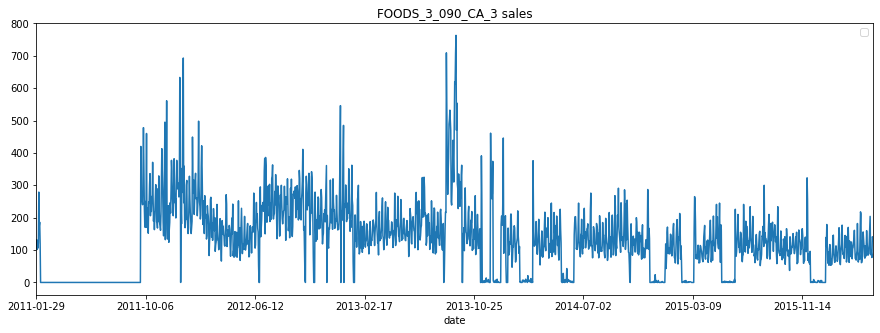

In [6]:
# Plotting one Food item

food_example = get_timeseries_df('FOODS_3_090_CA_3_validation')
# food_example.head()
food_example.plot(figsize=(15, 5),
                  title='FOODS_3_090_CA_3 sales')
plt.legend('')
plt.show()

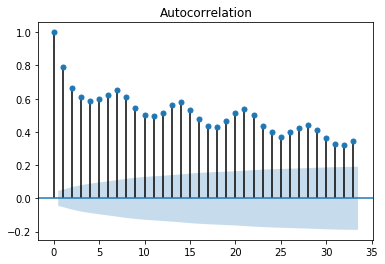

In [7]:
plot_acf(food_example)
plt.show()

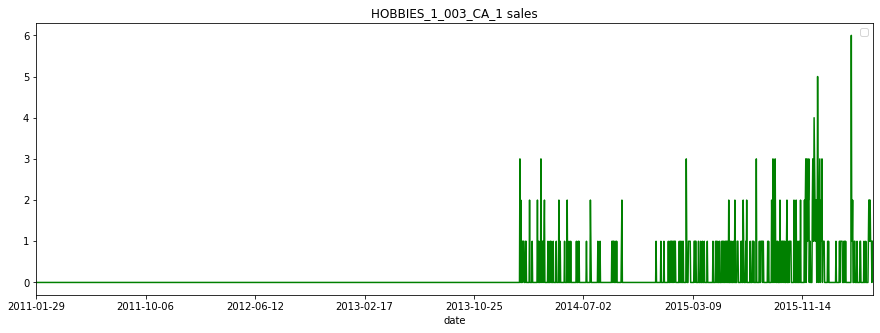

In [8]:
# Plotting one Hobbies item

hobbies_example = get_timeseries_df('HOBBIES_1_003_CA_1_validation')
# hobbies_example.head()
hobbies_example.plot(figsize=(15, 5),
                     title='HOBBIES_1_003_CA_1 sales',
                     color = 'green')
plt.legend('')
plt.show()


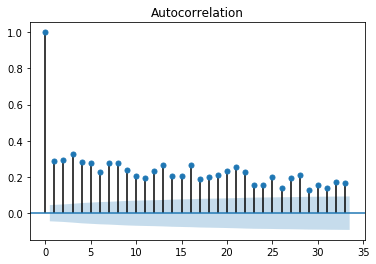

In [9]:
plot_acf(hobbies_example)
plt.show()

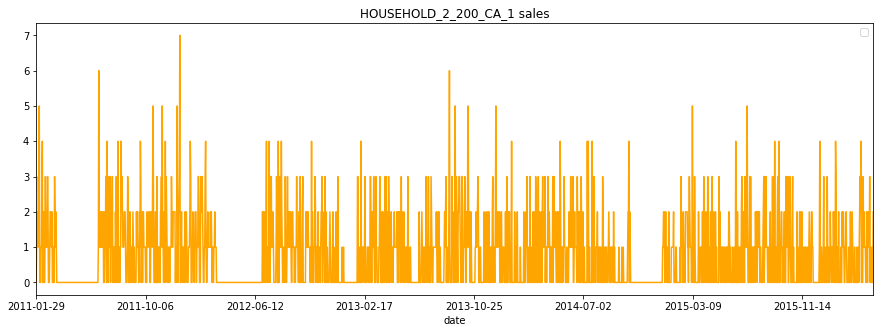

In [10]:
# Plotting one Household item

household_example = get_timeseries_df('HOUSEHOLD_2_200_CA_1_validation')
# household_example.head()
household_example.plot(figsize=(15, 5),
                     title='HOUSEHOLD_2_200_CA_1 sales',
                     color = 'orange')
plt.legend('')
plt.show()


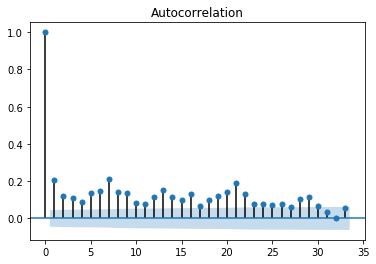

In [11]:
plot_acf(household_example)
plt.show()

In [12]:
def get_timeseries_tendf(category):
    data_cols = [c for c in saltrvald_df.columns if 'd_' in c] #getting sales data columns

    if category == 'Foods':
        ten_examples = saltrvald_df[saltrvald_df['cat_id'] == 'FOODS'].sample(n=10, random_state=42).set_index('id')[data_cols].T \
                                .rename(columns= lambda x : re.sub('_validation', '', x)) \
                                .merge(cal_df.set_index('d')['date'], left_index=True, right_index=True, validate='1:1') \
                                .set_index('date')
        return ten_examples
    elif category == 'Hobbies':
        ten_examples = saltrvald_df[saltrvald_df['cat_id'] == 'HOBBIES'].sample(n=10, random_state=42).set_index('id')[data_cols].T \
                                .rename(columns= lambda x : re.sub('_validation', '', x)) \
                                .merge(cal_df.set_index('d')['date'], left_index=True, right_index=True, validate='1:1') \
                                .set_index('date')
        return ten_examples
    elif category == 'Household':
        ten_examples = saltrvald_df[saltrvald_df['cat_id'] == 'HOUSEHOLD'].sample(n=10, random_state=42).set_index('id')[data_cols].T \
                                .rename(columns= lambda x : re.sub('_validation', '', x)) \
                                .merge(cal_df.set_index('d')['date'], left_index=True, right_index=True, validate='1:1') \
                                .set_index('date')
        return ten_examples
    else:
        return 'Category unavailable.'
        

    

In [13]:
ten_food_examples = get_timeseries_tendf('Foods')
ten_food_examples.head()

,FOODS_2_007_TX_1,FOODS_3_200_TX_3,FOODS_3_801_WI_1,FOODS_3_280_WI_2,FOODS_2_124_CA_4,FOODS_1_210_TX_2,FOODS_3_698_CA_3,FOODS_3_360_CA_3,FOODS_3_709_WI_2,FOODS_1_006_WI_1
date,,,,,,,,,,
2011-01-29,0,1,0,0,0,0,0,1,0,3
2011-01-30,0,3,0,0,0,0,0,0,0,3
2011-01-31,0,1,0,0,0,0,0,1,0,5
2011-02-01,0,1,0,0,0,0,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,1,0,0


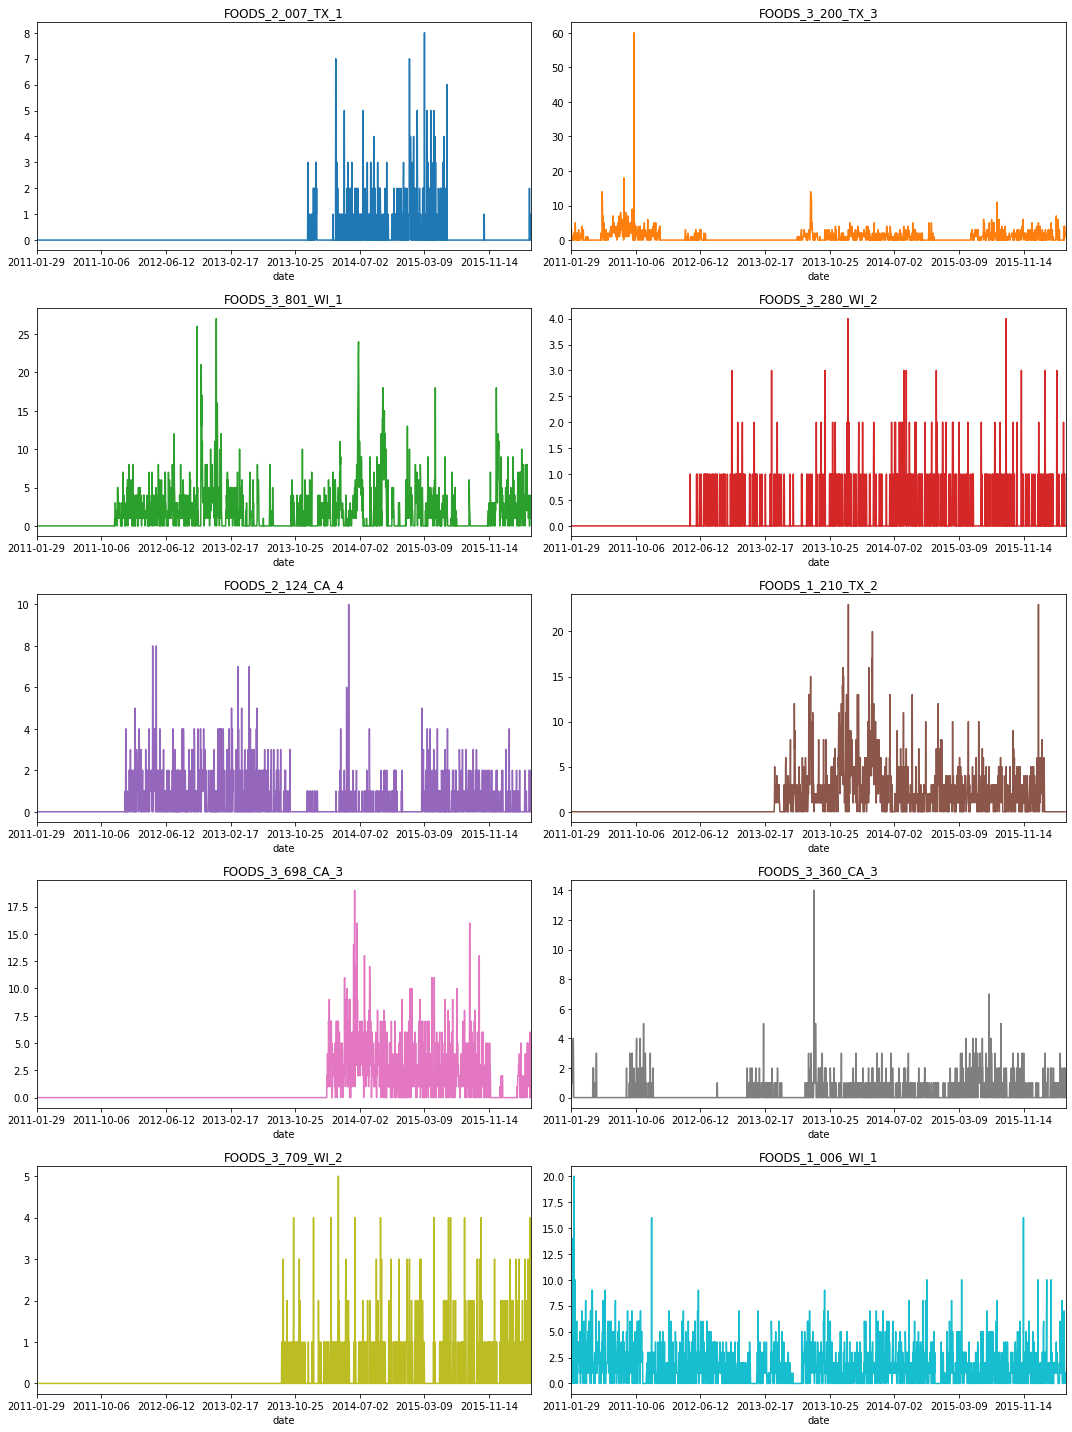

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for food in ten_food_examples.columns:
    ten_food_examples[food].plot(title=food,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [15]:
ten_hobbies_examples = get_timeseries_tendf('Hobbies')
ten_hobbies_examples.head()

,HOBBIES_1_190_TX_3,HOBBIES_1_212_WI_1,HOBBIES_1_390_CA_1,HOBBIES_1_388_WI_1,HOBBIES_2_039_TX_3,HOBBIES_1_172_CA_1,HOBBIES_2_140_CA_1,HOBBIES_2_031_TX_3,HOBBIES_1_319_TX_3,HOBBIES_1_024_WI_3
date,,,,,,,,,,
2011-01-29,0,0,2,0,0,1,0,0,0,0
2011-01-30,0,0,1,0,0,0,0,0,0,0
2011-01-31,0,0,0,0,0,0,0,0,1,0
2011-02-01,0,0,0,0,0,1,0,0,0,0
2011-02-02,0,0,0,0,1,0,0,0,0,0


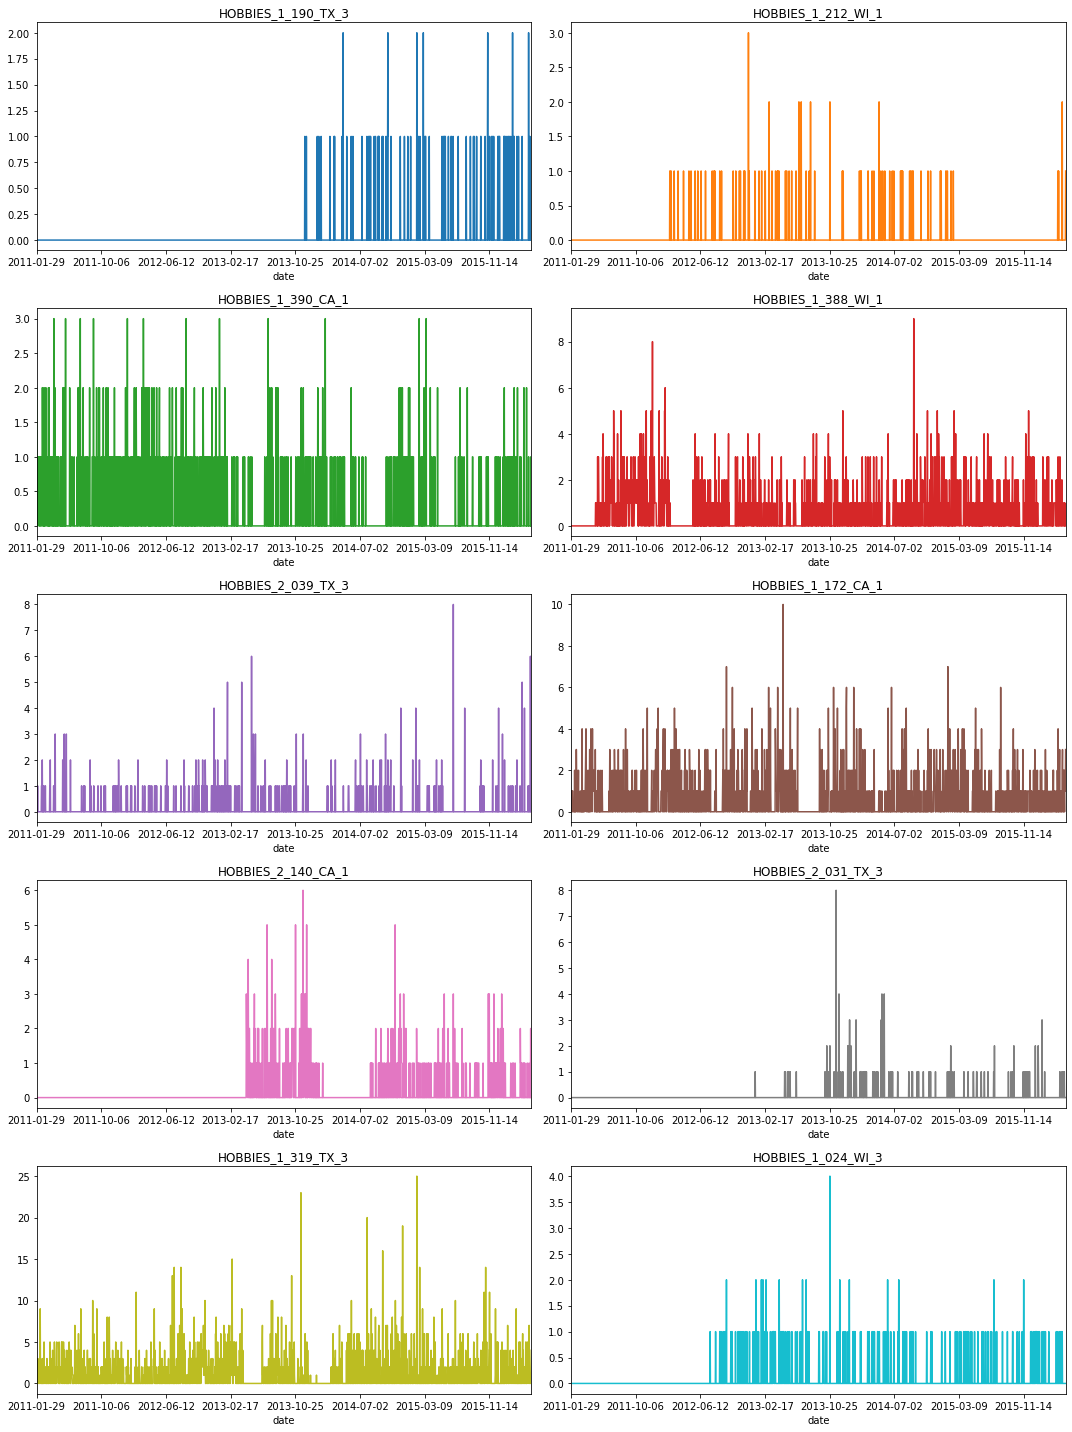

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for hobby in ten_hobbies_examples.columns:
    ten_hobbies_examples[hobby].plot(title=hobby,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [17]:
ten_household_examples = get_timeseries_tendf('Household')
ten_household_examples.head()

,HOUSEHOLD_1_243_WI_1,HOUSEHOLD_2_131_WI_1,HOUSEHOLD_1_021_CA_3,HOUSEHOLD_1_146_WI_1,HOUSEHOLD_2_363_WI_3,HOUSEHOLD_1_267_TX_3,HOUSEHOLD_2_468_TX_1,HOUSEHOLD_1_047_CA_3,HOUSEHOLD_2_015_TX_2,HOUSEHOLD_2_036_TX_2
date,,,,,,,,,,
2011-01-29,1,1,2,2,1,0,0,0,4,2
2011-01-30,2,1,0,5,0,0,0,0,2,1
2011-01-31,1,1,0,1,0,0,0,0,0,0
2011-02-01,2,0,0,0,1,0,1,0,0,1
2011-02-02,0,0,0,0,1,0,0,0,2,0


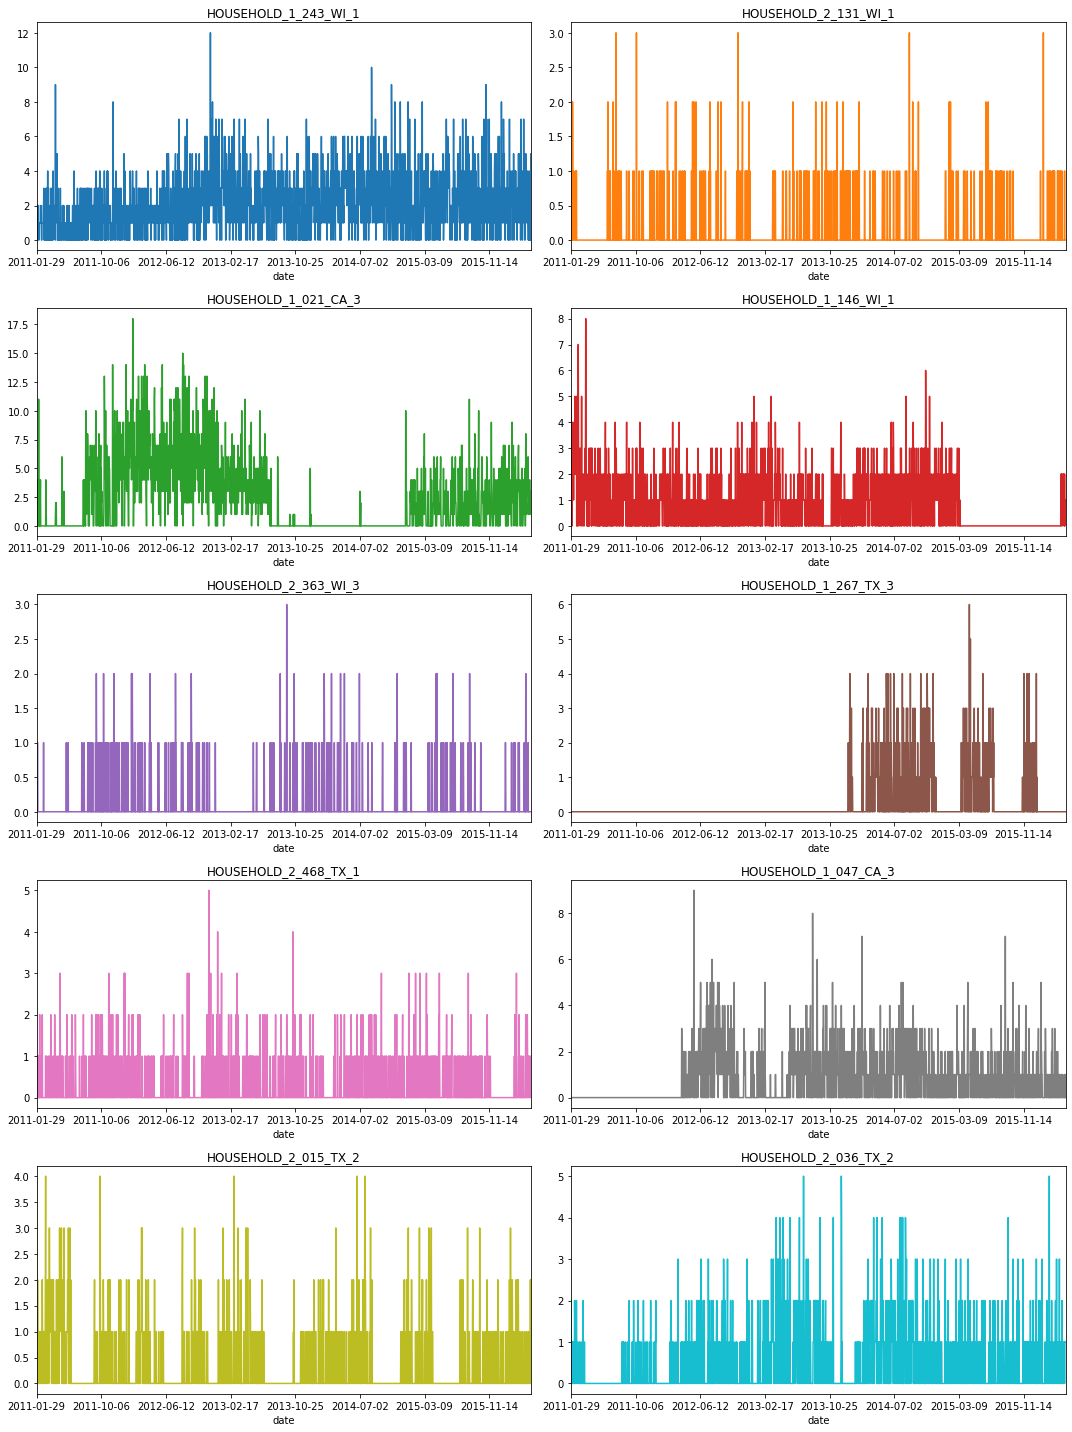

In [18]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for household in ten_household_examples.columns:
    ten_household_examples[household].plot(title=household,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [19]:
saltrvald_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [20]:
data_cols = [c for c in saltrvald_df.columns if 'd_' in c] #getting sales data columns

state_df = saltrvald_df.groupby('state_id').agg('sum').T
state_df = state_df.reset_index().rename(columns={'index' : 'd'})
state_df = state_df.merge(cal_df, how='left', validate='1:1')

state_df = state_df.set_index('date')[['CA', 'WI', 'TX']]
state_df.head()

,CA,WI,TX
date,,,
2011-01-29,14195,8998,9438
2011-01-30,13805,8314,9630
2011-01-31,10108,6897,6778
2011-02-01,11047,6984,7381
2011-02-02,9925,3309,5912


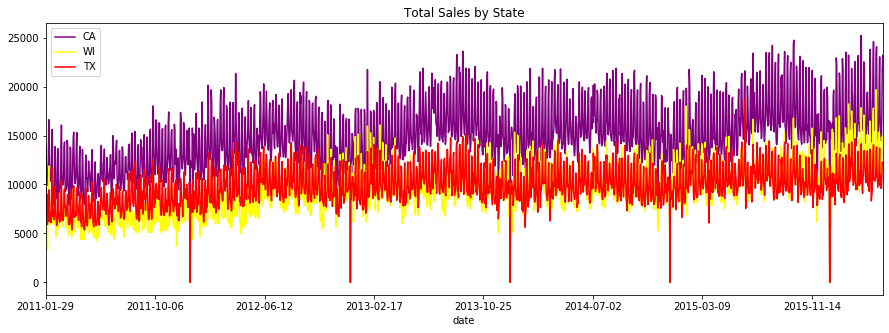

In [21]:
color_dict = {'CA' : 'purple', 'WI' : 'yellow', 'TX' : 'red'}
state_df.plot(figsize=(15, 5),
              title='Total Sales by State',
              color = [color_dict.get(x) for x in state_df.columns])
plt.show()

In [22]:
state_my_df = state_df.reset_index().rename(columns={'index' : 'date'})
state_my_df['date'] = pd.to_datetime(state_my_df['date'])
state_my_df['date'] = state_my_df.date.dt.to_period('M')
state_my_df = state_my_df.groupby('date').agg('sum')

state_my_df.head()

,CA,WI,TX
date,,,
2011-01,38108,24209,25846
2011-02,318101,196259,212015
2011-03,339678,198727,225162
2011-04,331004,186028,220681
2011-05,321566,176376,221620


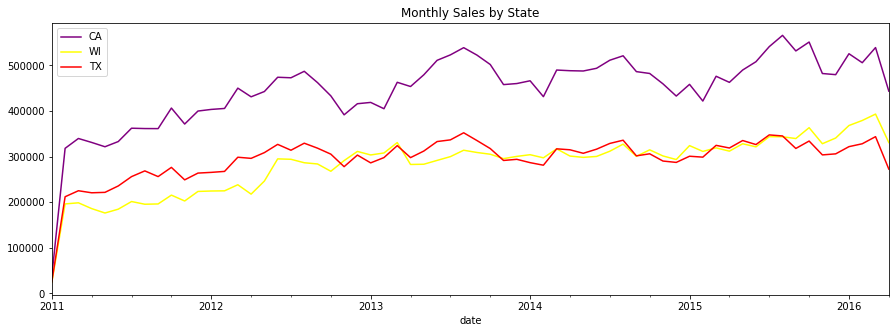

In [23]:
state_my_df.plot(figsize=(15, 5),
              title='Monthly Sales by State',
              color = [color_dict.get(x) for x in state_df.columns])
plt.show()

In [24]:
past_sales = saltrvald_df.set_index('id')[data_cols].T \
                .merge(cal_df.set_index('d')['date'], left_index=True, right_index=True, validate='1:1') \
                .set_index('date')

past_sales.head()


,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


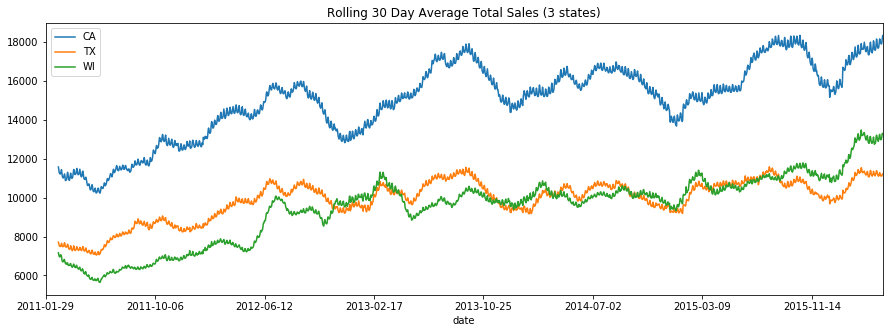

In [25]:
for states in saltrvald_df['state_id'].unique():
    state_items = [item for item in past_sales.columns if states in item]
    past_sales[state_items].sum(axis=1).rolling(30).mean() \
                            .plot(figsize=(15, 5),
                                  title='Rolling 30 Day Average Total Sales (3 states)',
                                  color=next(color_cycle))

plt.legend(saltrvald_df['state_id'].unique())
plt.show()

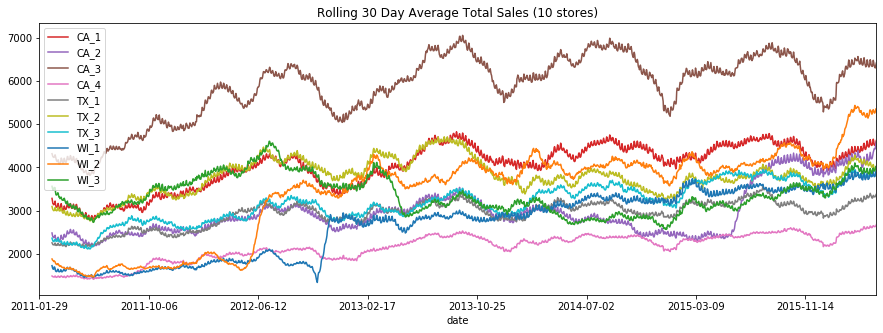

In [26]:
for stores in saltrvald_df['store_id'].unique():
    store_items = [item for item in past_sales.columns if stores in item]
    past_sales[store_items].sum(axis=1).rolling(30).mean() \
                            .plot(figsize=(15, 5),
                                  title='Rolling 30 Day Average Total Sales (10 stores)',
                                  color=next(color_cycle))

plt.legend(saltrvald_df['store_id'].unique())
plt.show()

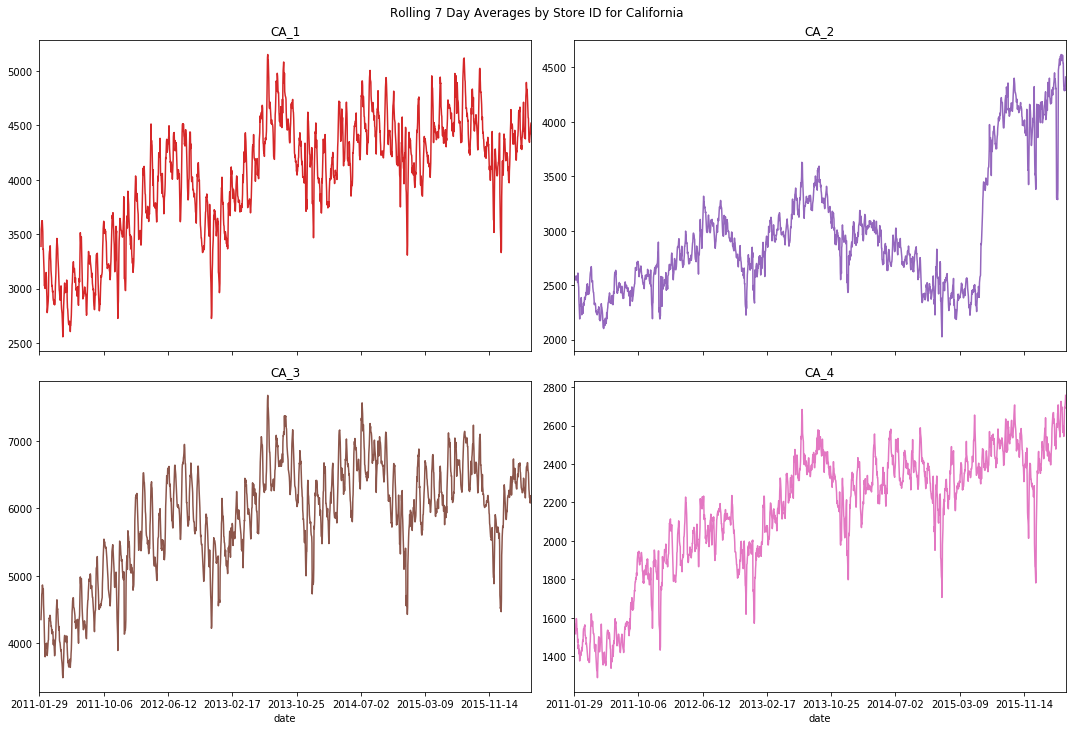

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

ax_idx = 0
for stores in saltrvald_df[saltrvald_df['state_id'] == 'CA']['store_id'].unique():
    store_items = [item for item in past_sales.columns if stores in item]
    past_sales[store_items].sum(axis=1).rolling(7).mean() \
                            .plot(alpha=1, ax=axes[ax_idx], title=stores, color=next(color_cycle))
    ax_idx += 1
    
plt.suptitle('Rolling 7 Day Averages by Store ID for California',fontsize=12,y=1.01)
plt.tight_layout()
plt.show()

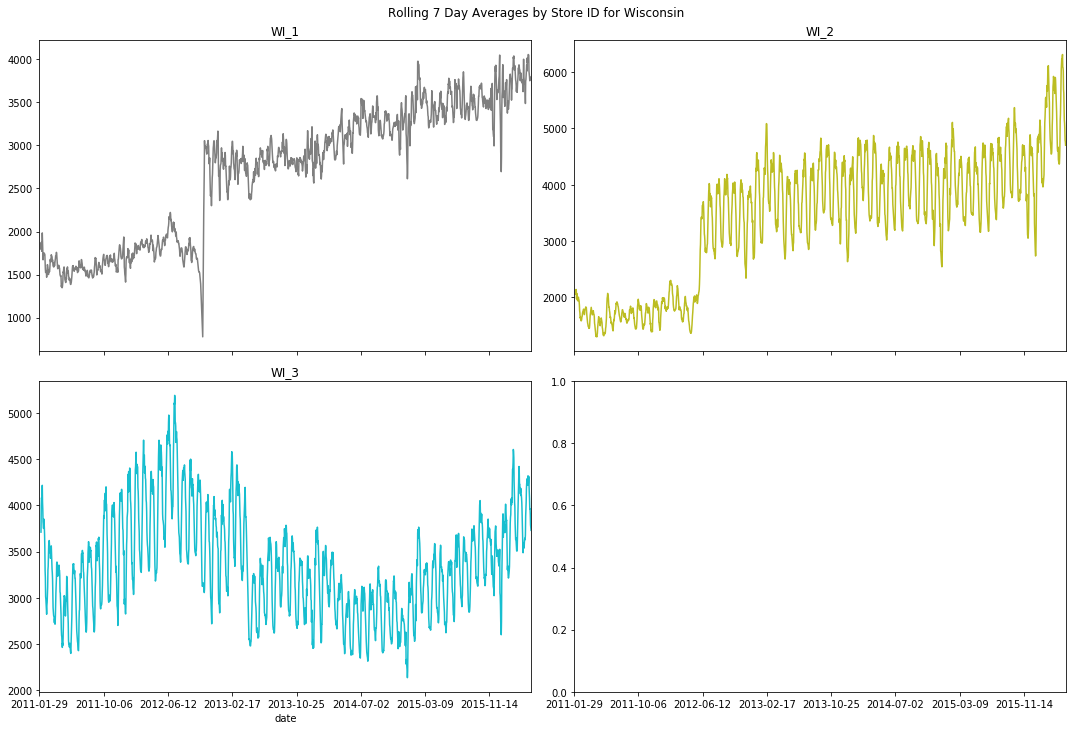

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

ax_idx = 0
for stores in saltrvald_df[saltrvald_df['state_id'] == 'WI']['store_id'].unique():
    store_items = [item for item in past_sales.columns if stores in item]
    past_sales[store_items].sum(axis=1).rolling(7).mean() \
                            .plot(alpha=1, ax=axes[ax_idx], title=stores, color=next(color_cycle))
    ax_idx += 1
    
plt.suptitle('Rolling 7 Day Averages by Store ID for Wisconsin',fontsize=12,y=1.01)
plt.tight_layout()
plt.show()

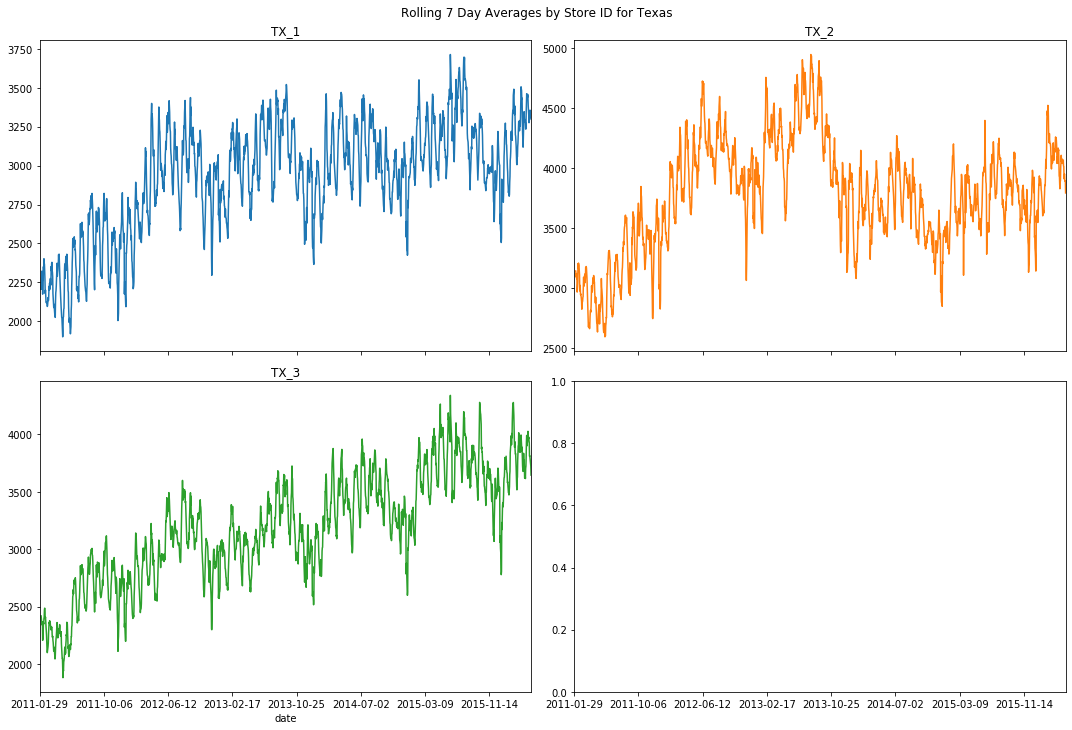

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

ax_idx = 0
for stores in saltrvald_df[saltrvald_df['state_id'] == 'TX']['store_id'].unique():
    store_items = [item for item in past_sales.columns if stores in item]
    past_sales[store_items].sum(axis=1).rolling(7).mean() \
                            .plot(alpha=1, ax=axes[ax_idx], title=stores, color=next(color_cycle))
    ax_idx += 1
    
plt.suptitle('Rolling 7 Day Averages by Store ID for Texas',fontsize=12,y=1.01)
plt.tight_layout()
plt.show()

In [30]:
saltrvald_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [31]:
food_sales = past_sales[[item for item in past_sales.columns if 'FOODS' in item]]
hobbies_sales = past_sales[[item for item in past_sales.columns if 'HOBBIES' in item]]
household_sales = past_sales[[item for item in past_sales.columns if 'HOUSEHOLD' in item]]

In [32]:
food_sales = food_sales.reset_index().rename(columns = {'index' : 'date'})
food_sales['date'] = pd.to_datetime(food_sales['date'])
food_sales = food_sales.set_index('date')
food_sales = food_sales.stack().reset_index(level=1, drop=True)

In [33]:
hobbies_sales = hobbies_sales.reset_index().rename(columns = {'index' : 'date'})
hobbies_sales['date'] = pd.to_datetime(hobbies_sales['date'])
hobbies_sales = hobbies_sales.set_index('date')
hobbies_sales = hobbies_sales.stack().reset_index(level=1, drop=True)

In [34]:
household_sales = household_sales.reset_index().rename(columns = {'index' : 'date'})
household_sales['date'] = pd.to_datetime(household_sales['date'])
household_sales = household_sales.set_index('date')
household_sales = household_sales.stack().reset_index(level=1, drop=True)

In [35]:
type(food_sales.index), type(hobbies_sales.index), type(household_sales.index)

(pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex)

C:\Users\anima\Anaconda3\lib\site-packages\calmap\__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


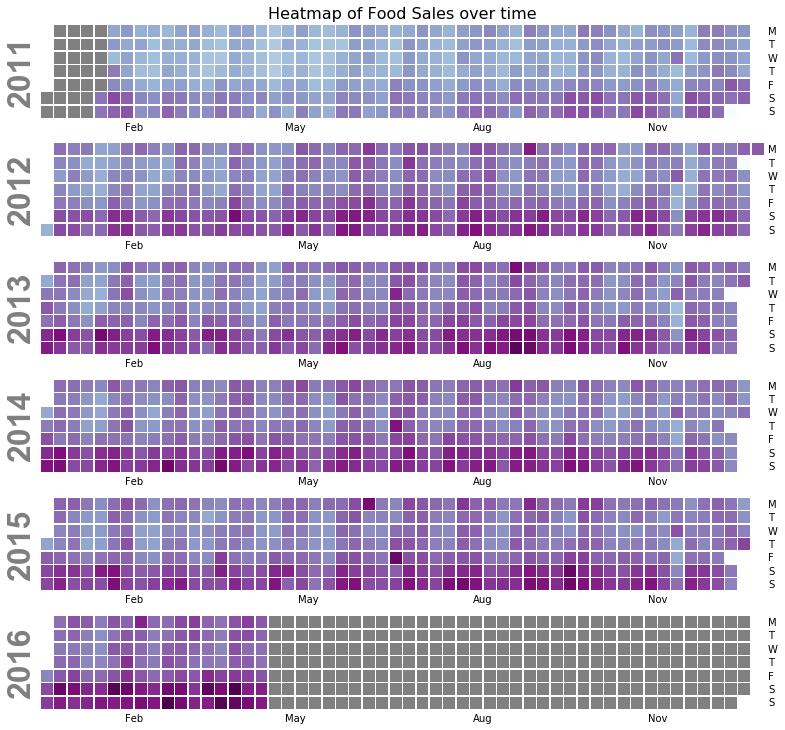

In [36]:
calmap.calendarplot(food_sales, monthticks=3, daylabels='MTWTFSS',
                    cmap='BuPu',
                    fillcolor='grey', linewidth=0.5,
                    fig_kws=dict(figsize=(20, 10)))

plt.suptitle('Heatmap of Food Sales over time',fontsize=16,y=1.01)
plt.show()

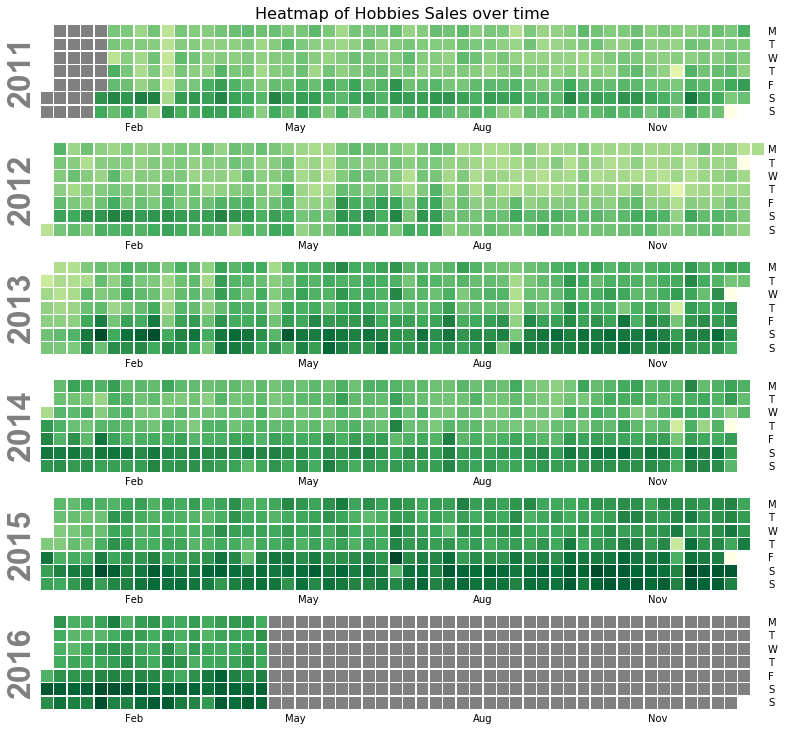

In [37]:
calmap.calendarplot(hobbies_sales, monthticks=3, daylabels='MTWTFSS',
                    cmap='YlGn',
                    fillcolor='grey', linewidth=0.5,
                    fig_kws=dict(figsize=(20, 10)))

plt.suptitle('Heatmap of Hobbies Sales over time',fontsize=16,y=1.01)
plt.show()

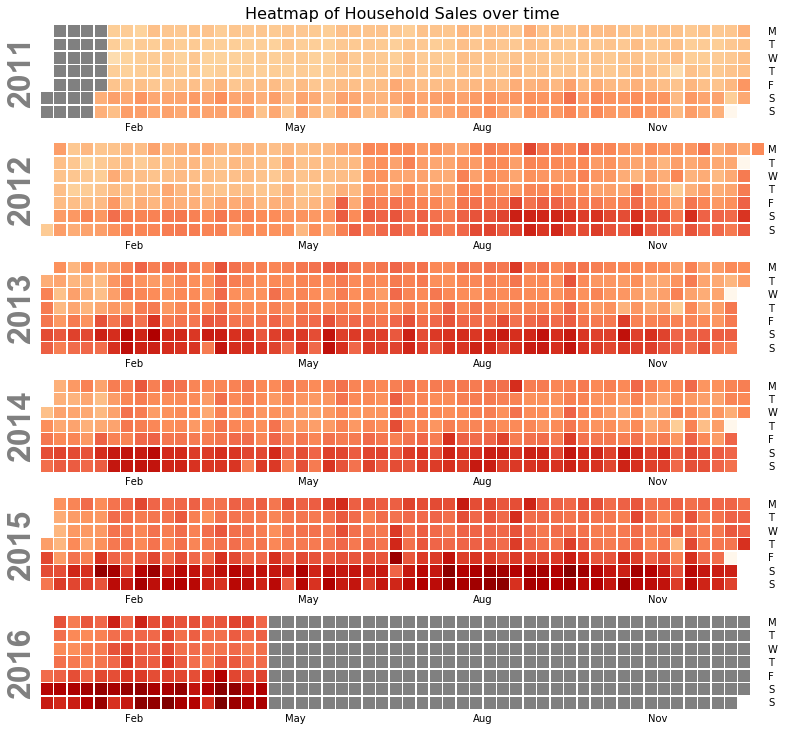

In [38]:
calmap.calendarplot(household_sales, monthticks=3, daylabels='MTWTFSS',
                    cmap='OrRd',
                    fillcolor='grey', linewidth=0.5,
                    fig_kws=dict(figsize=(20, 10)))

plt.suptitle('Heatmap of Household Sales over time',fontsize=16,y=1.01)
plt.show()